In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, _), (X_test, _) = cifar10.load_data()

In [3]:
L, W, H, C = X_train.shape

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_train = X_train.reshape(-1, W*H*C).astype('float32')/255
X_test = X_test.reshape(-1, W*H*C).astype('float32')/255

In [6]:
X_test.shape

(10000, 3072)

**모델 구축**

In [7]:
inputs = keras.Input(shape=(3072,))
encoded = layers.Dense(32, activation = 'relu')(inputs)
latent = layers.Dense(32, activation = 'relu')(encoded)
decoded = layers.Dense(3072, activation = 'sigmoid')(latent)
autoencoder = Model(inputs = inputs, outputs = decoded)

In [8]:
autoencoder.compile(optimizer='adam', loss='mse')

In [9]:
autoencoder.fit(X_train, X_train, epochs=10, shuffle = True, validation_data=(X_test, X_test), batch_size=256)

Epoch 1/10
196/196 [==============================] - 8s 34ms/step - loss: 0.0442 - val_loss: 0.0362
Epoch 2/10
196/196 [==============================] - 5s 27ms/step - loss: 0.0318 - val_loss: 0.0288
Epoch 3/10
196/196 [==============================] - 5s 27ms/step - loss: 0.0275 - val_loss: 0.0260
Epoch 4/10
196/196 [==============================] - 5s 26ms/step - loss: 0.0252 - val_loss: 0.0244
Epoch 5/10
196/196 [==============================] - 5s 28ms/step - loss: 0.0239 - val_loss: 0.0234
Epoch 6/10
196/196 [==============================] - 6s 28ms/step - loss: 0.0232 - val_loss: 0.0229
Epoch 7/10
196/196 [==============================] - 6s 29ms/step - loss: 0.0227 - val_loss: 0.0227
Epoch 8/10
196/196 [==============================] - 6s 31ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 9/10
196/196 [==============================] - 5s 27ms/step - loss: 0.0225 - val_loss: 0.0225
Epoch 10/10
196/196 [==============================] - 5s 28ms/step - loss: 0.0224 - val_lo

313/313 [==============================] - 1s 4ms/step


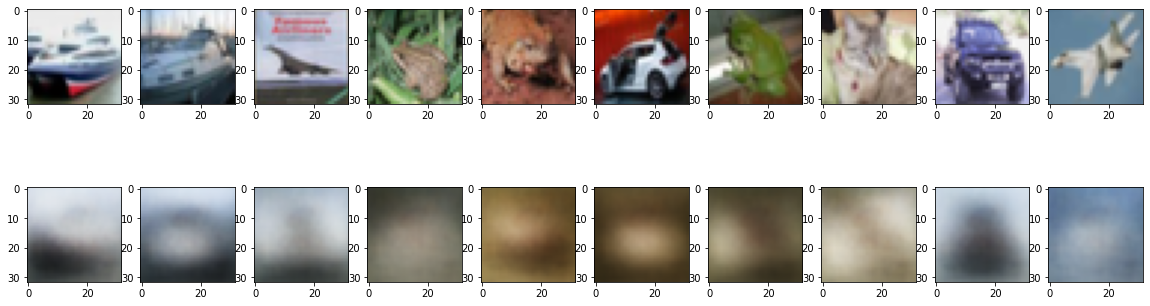

In [11]:
decoded_img = autoencoder.predict(X_test)

n=10
plt.figure(figsize=(20, 6))
for i in range(1, n+1):
  ax = plt.subplot(2, n, i)
  plt.imshow(X_test[i].reshape(32, 32, 3))
  ax = plt.subplot(2, n, i+n)
  plt.imshow(decoded_img[i].reshape(32, 32, 3))

plt.show()